<a href="https://colab.research.google.com/github/G-Bones/AI-Group-Project-Repos/blob/main/Copy_of_Copy_of_CAP4630_P2_Summer2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 4630 - Intro to AI
## Project 2 - Summer 2022
## Flower classification using machine learning techniques



###Header
Group Members: Romari Bartley (developer), Gerrell Bones, David Porter

Due Data: July 9, 2022

Course: CAP4630

Assignment: Project 2

Objective: 3-class classification of the Iris Dataset ussing machine learning


Testing:

Researcher: 

Interface:

Useful references and sources:

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/uciml/iris
- http://archive.ics.uci.edu/ml/datasets/Iris/
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html 
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### (OPTIONAL) TODO 1

Add your own sources and references here.

## Setup

We provide the initial setup of the notebook. In this section we import the necessary libraries so you can build your model.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier


from joblib import dump, load

## Part 1. Load the data

The first step is to load the necessary data. 

Use the command `read_csv` from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset. 

The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [ ]:
# load the data
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Part 2. Explore and visualize the data



After loading the dataset into a dataframe in memory, the next step is to perform an exploratory data analysis. The objective of the EDA is to discover as much information as possible about the dataset. 

The `describe()` method is a good starting point. The `describe()` method prints statistics of the dataset, like mean, standard deviation, etc.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A very important tool in exploratory data analysis is data visualization, which helps us to gain insights about the dataset. 

### TODO 2

Write code to generate a pair plot for the Iris dataset.

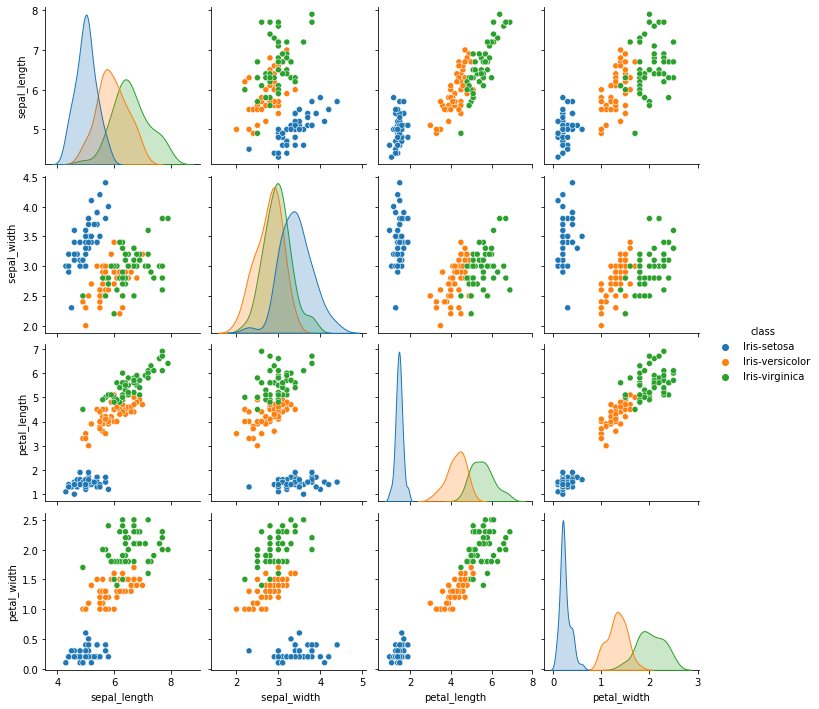

In [ ]:
# ENTER YOUR CODE HERE (DONE)
sns.pairplot(iris,hue="class") #plotting the 4 main features of the dataset and using color to distiguish the classes

Write a code to generate a correlation matrix and display using heat map

The .corr() will give the correlation between the variables and seaborn heatmap will provide the figure displaying the correlation between variables.

In [ ]:
# ENTER YOUR CODE HERE (DONE)
iris.corr() #displaying correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


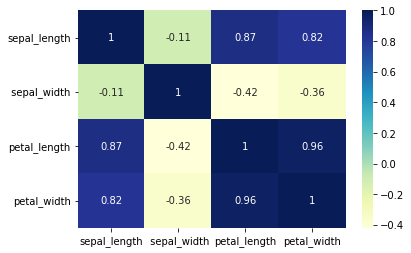

In [ ]:
# ENTER THE CODE FOR GENERATING HEATMAP (DONE)
#visualising correlation
heat_iris=iris.corr()
sns.heatmap(heat_iris,cmap='YlGnBu',annot=True)

**In a few words describe your observation by looking at the correlation of the features in the heatmap. (For example mention highly correlated features and weekly correlated features)**

Based on the heat map:

sepal length is highly correlated with petal length 

sepal length is highly correlated with petal width

petal length is highly correlated with petal width



Check the size of class distribution by using groupby and size() command to analyze if the data is balanced

In [ ]:
# ENTER THE CODE TO ANALYZE CLASS DISTRIBUTION (DONE)
iris.groupby(['class']).size() #chekign how evenly classes are distributed throughout the dataset
        

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Part 3. Preprocess the data

Frequently, the dataset collected from databases, files or scraping the internet is not ready
to be consumed by a machine learning algorithm. 

In most cases, the dataset needs some kind of preparation or preprocessing before being used as input to a machine learning algorithm. 

In this case, we convert the string values of the class column to integer numbers because the algorithm we are going to use does not process string values.

In [ ]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris['class_encod'] = iris['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
iris['class_encod'].unique()

array([0, 1, 2])

In [ ]:
y = iris[['class_encod']] # target attributes 
X = iris.iloc[:, 0:4] # input attributes
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,class_encod
0,0
1,0
2,0
3,0
4,0


### TODO 3
Write code to normalize the features of the iris dataset so that all attributes fit within the [0..1] range.

In [ ]:
# ENTER YOUR CODE HERE (DONE)
scaler = MinMaxScaler(feature_range=(0, 1)) #creating a MinMaxScaler object with 0 to 1 range
scaler.fit(X) #fitting the data
b=scaler.transform(X) #transforming data to normalized values
new_cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width']
X=pd.DataFrame(b,columns=new_cols) #convering b from numpy array to dataframe and assigning it to X
X.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## Part 4. Select an algorithm and train the model

After exploring and preprocessing our data we can build our machine learning model to classify Iris specimens. 

The method `train_test_split()` will split the `X` and `y` dataframes in training data and test data.


In [ ]:
import random
random.seed(42) # for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(105, 1)

### 4.1 K-nearest-neighbors (KNN) classifier

Let's use `X_train` and `y_train` to build a KNN classifier, using the `KNeighborsClassifier` class provided by scikit-learn. 

Because the machine learning algorithm is already implemented by the library, all we have to do is call the method `fit()` passing the `X_train` and `y_train` datasets as arguments.

In [ ]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier()

Once the model is built, we can use the `predict()` method to calculate the predicted category of a instance. 

In this case, we want to predict the class of the first 10 lines of the `X_test` dataset. The return is an array containing the estimated categories.

In [ ]:
m.predict(X_test.iloc[0:10])


array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10]


,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


We can use methods like `score()` and `confusion_matrix()` to measure the performance of our model. 

We see that the accuracy of our model is very close to 100%, which means that the model predicted correctly almost all cases of the test dataset. 

In [ ]:
m.score(X_test, y_test)

0.9777777777777777

A confusion matrix shows where the errors occurred, i.e., which classes were misclassified. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


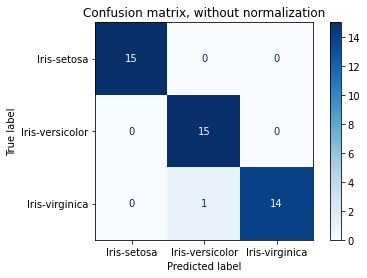

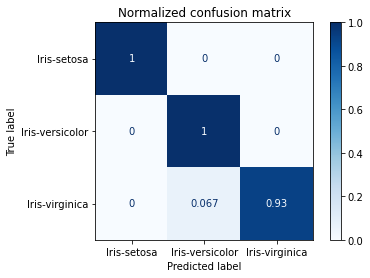

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(m, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [ ]:
y_pred_knn = m.predict(X_test)

The classification report is a good practice to see the precision, recall and F1 score of the model's performance based on the target. 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Save the model for later use

We might want to save our model for later use. 

For example, we could embed our model into a webservice or mobile application. So we use the method `dump()` from the joblib package to save the model to a file.

In [ ]:
dump(m, 'iris-classifier.dmp')

['iris-classifier.dmp']

In [ ]:
ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

### 4.2 **Decision tree classifier**


### TODO 4

Write code to build a decision tree classifier, using the `DecisionTreeClassifier` class provided by scikit-learn. 

Similarly to 4.1 above, your code should build, train, and test the classifier, compute its accuracy, display the confusion matrices and classification report, save the model to a file for later use, load it from file and confirm that it's working.


In [ ]:
# ENTER YOUR CODE HERE (DONE)
n = DecisionTreeClassifier() #new decision tree classifier object
n.fit(X_train, np.ravel(y_train)) #fitting training data

DecisionTreeClassifier()

In [ ]:
n.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
y_test[0:10]

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


In [ ]:
n.score(X_test, y_test)

0.9555555555555556

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


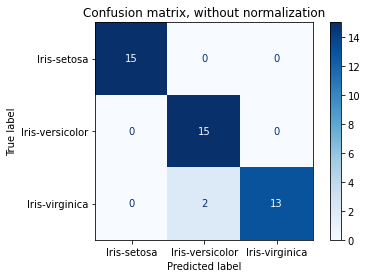

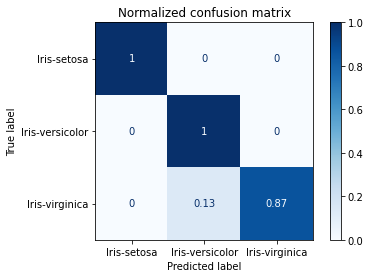

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(n, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [ ]:
y_pred_tree = n.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



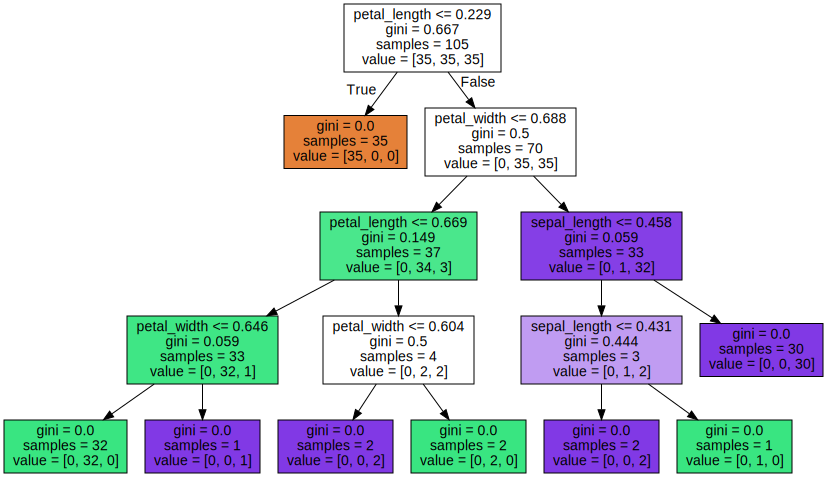

In [ ]:
#displaying decision tree

from sklearn import tree
tree.export_graphviz(n)
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(n, out_file=None, feature_names=X.columns, filled=True))


In [ ]:
dump(n, 'iris-tree-classifier.dmp') #saving the model

['iris-tree-classifier.dmp']

In [ ]:
itc = load('iris-tree-classifier.dmp') #loading the saved model
confusion_matrix(y_test, itc.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

### 4.3 Support Vector Classification

### TODO 5

Write a code to build a SVC (support vector classifier) using SVC provided by scikit-learn. Similar to 4.1 above, your code should build, train and test classifier, compute its accuracy, display confusion matrics and classification report. Save the model to a file for later use, load it from the file and confirm that it's working.

In [ ]:
# ENTER THE CODE HERE (DONE)

from sklearn.svm import SVC
o=SVC()  #new Support Vector Classification object
o.fit(X_train, np.ravel(y_train)) #fitting training data



SVC()

In [ ]:
o.predict(X_test.iloc[0:10]) #predicting classes 

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10] #printing actual labels for 10 of the testing data that was predicted 

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


In [ ]:
o.score(X_test, y_test) #accuracy of the model

0.9777777777777777

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


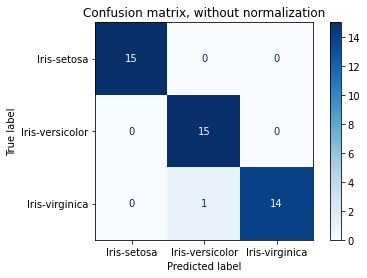

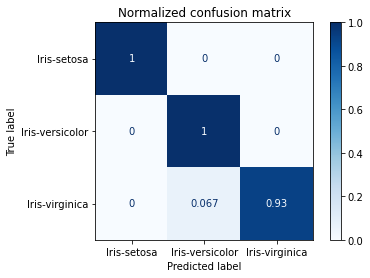

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(o, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [ ]:
y_pred_svc = o.predict(X_test)

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
dump(o, 'iris-svc-classifier.dmp') #saving model

['iris-svc-classifier.dmp']

In [ ]:
isvcc = load('iris-svc-classifier.dmp') #loading model
confusion_matrix(y_test, isvcc.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

### 4.4 Gaussian Naive Bayes Classifier 

### TODO 6

Write a code to build a [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) provided by scikit-learn. Similar to 4.1 above, your code should build, train and test classifier, compute its accuracy, display confusion matrics and classification report. Save the model to a file for later use, load it from the file and confirm that it's working.

In [ ]:
# ENTER THE CODE HERE
from sklearn.naive_bayes import GaussianNB
p=GaussianNB() #new Gaussian Naive Bayes Classifier object
p.fit(X_train, np.ravel(y_train)) #fitting data


GaussianNB()

In [ ]:
p.predict(X_test.iloc[0:10]) #predicting the classes

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10] #displaying actual labels

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


In [ ]:
p.score(X_test, y_test) #accuracy of the model

0.9777777777777777

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


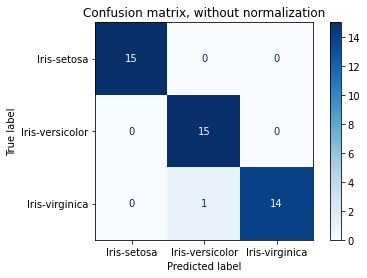

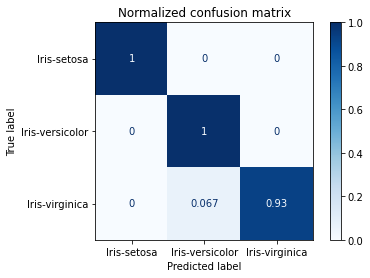

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(p, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [ ]:
y_pred_gau = p.predict(X_test) 

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gau))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
dump(p, 'iris-gau-classifier.dmp') #saving model

['iris-gau-classifier.dmp']

In [ ]:
igauc = load('iris-gau-classifier.dmp') #loading model
confusion_matrix(y_test, igauc.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

### CONCLUSION






**K-nearest-neighbors (KNN) classifier**



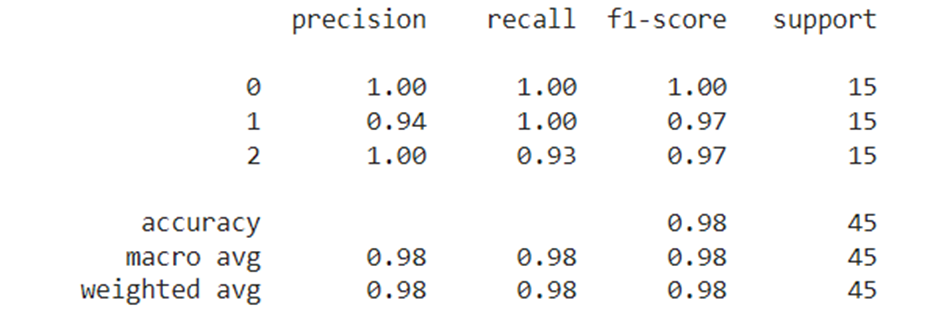

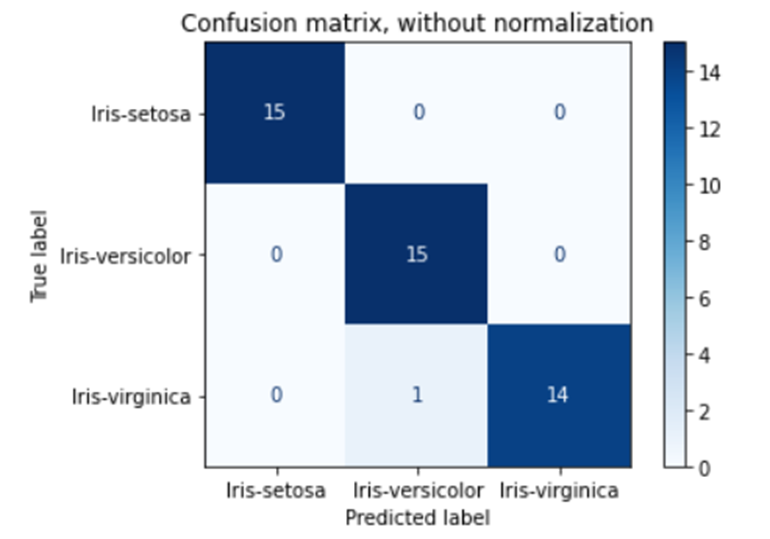

**Decision tree classifier** 

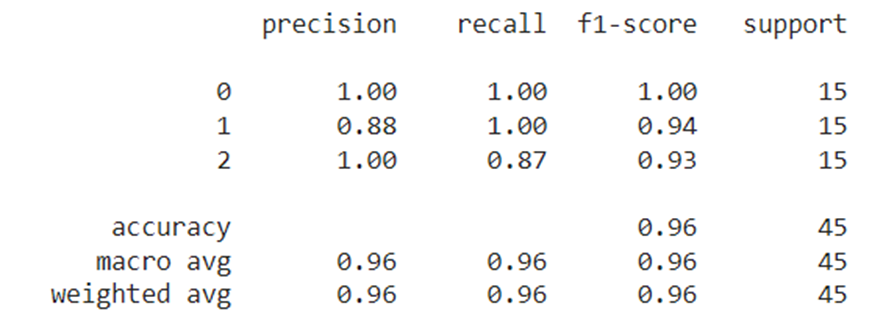

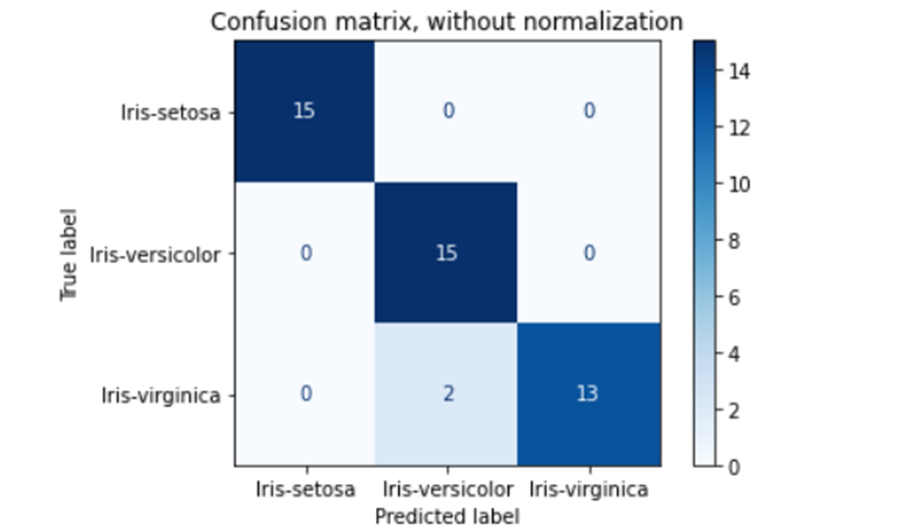

**Support vector classification**

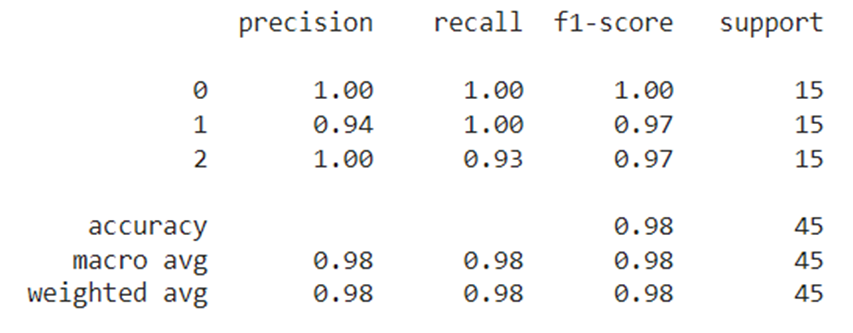

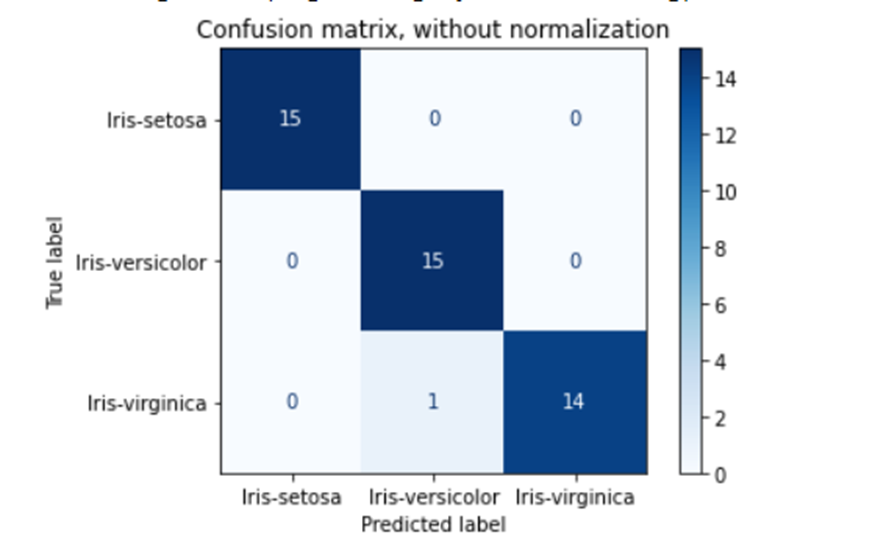

**Gaussian Naive Bayes Classifier**

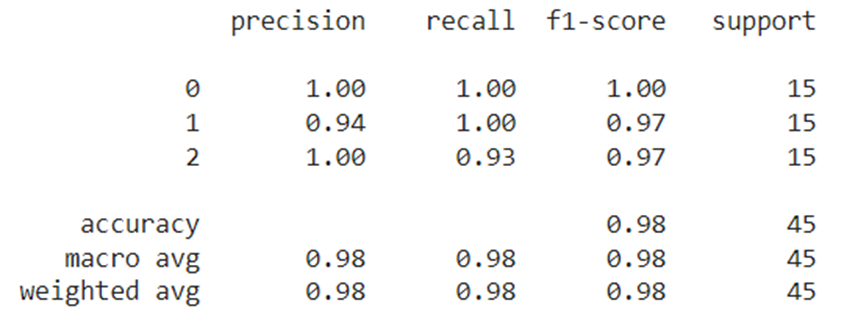

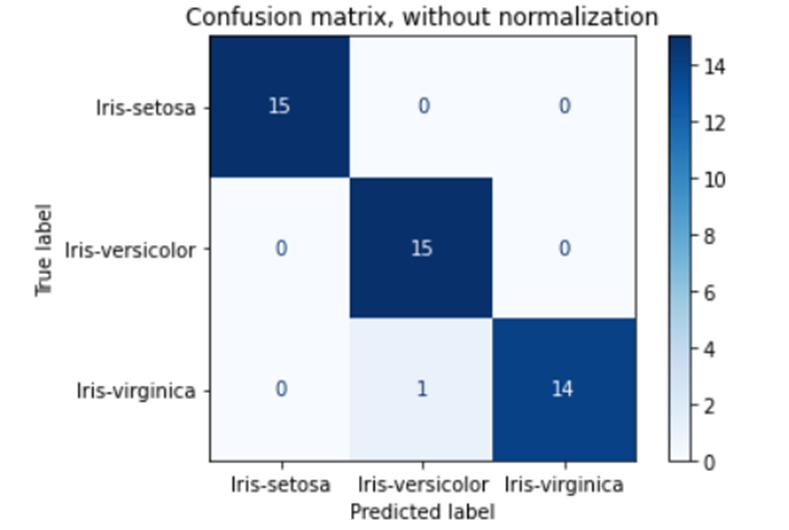

The pictures above represent one specific test. During this test, all except one classifier produced results with 98% accuracy. The classifier that did not yield a 98% accuracy was the Decision Tree Classifier (96%). It must be said that even though this was the case for a particular test, most other times saw identical results for each classifier. This is a result of the algorithms being so powerful in comparison to the relatively small size and minimal complications of the iris dataset. Due to this, this particular case was chosen simply for its variation. 


### LESSONS LEARNED

*   Normalization provides data in a form where it can be utilzed more easily.

##Report

###**Architect section**
The architect's first point of duty was to analyze and research the various libraries that were located within the setup section. After a general understanding of these libraries, parts 1 and 2 were then observed and understood. The architect then deduced that these two parts were responsible for accepting the data and getting a closer look at the dataset. This was followed by the analysis of part 3 (along with its “TODOS”). The architect found that this was essential in the preparation phase which would make the data suitable for training. After a brief look at part 4, it was seen that this was a final setup before training since it was the part where the data was split between training and testing. This was followed up by a careful analysis of part 4.1 where the KNN classifier was implemented and trained. Finally, after viewing the code for 4.1 and the prompts for 4.2,4.3, and 4.4, it was realized that their code needed to be similar to what was done in part 4.1. All of this was translated in detail to the developer. 
<br>
###**Report section**
It was noticed that the results for each of the algorithms were extremely similar. All of the algorithms posted high accuracy or near-perfect results. Based on our knowledge of machine learning and intricate these algorithms can be, we came to the conclusion that because the iris dataset is a relatively small and simple one, this would explain why all these algorithms were so accurate. While testing, a pattern of error was very noticeable. This pattern was one in which 1 or 2 Iris Virginica were incorrectly classified as an Iris Versicolor. During a specific run (screenshots provided above), the Decision Tree Classifier misclassified 2 while the other classifiers misclassified 1. Hence, it could be concluded that there were 1 or 2 specific Iris Virginica that had very similar characteristics or features to Iris Versicolor. 
<br><br>
**Developer Difficulties:**
<li>It was somewhat tricky to get the required plot for the iris dataset using the pairplot() function from the seaborn library. Getting the basic plot was enough, however, getting it color-coded posed a bit of a challenge.</li>
<br>
<li>There was an initial struggle to find the right cmap for the heat map.</li>
<br>
<li>There was a major problem when trying to accomplish the task of normalization. Converting the data from the raw data to normalized data went fairly smooth, however, this was not the case afterward. There were then major difficulties after the transform function was used as this returned a NumPy array instead of a data frame. As a result, the describe() function would work as it was not compatible with that type. To solve this, the transformed data that was in the form of a NumPy array was converted to a data frame and this then enabled us to use the describe function.  </li>
<br>
<li>	As it relates to displaying the tree for the decision tree classifier, there were moderate difficulties. Initial, the plot_tree() function was preferred, however, this was not as visually appealing as it should have been since it was in black and white and extremely small. To rectify these problems, the Graphviz library was used. (see screenshot below) </li>



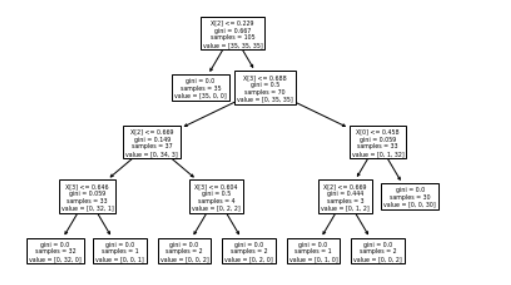


